In [82]:
#!wget https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption/household_power_consumption.zip
!wget https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip

--2024-01-10 03:58:36--  https://archive.ics.uci.edu/static/public/235/individual+household+electric+power+consumption.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘individual+household+electric+power+consumption.zip.4’

individual+househol     [    <=>             ]  19.68M  23.8MB/s    in 0.8s    

2024-01-10 03:58:37 (23.8 MB/s) - ‘individual+household+electric+power+consumption.zip.4’ saved [20640916]



In [83]:
!ls

household_power_consumption.txt
individual+household+electric+power+consumption.zip
individual+household+electric+power+consumption.zip.1
individual+household+electric+power+consumption.zip.2
individual+household+electric+power+consumption.zip.3
individual+household+electric+power+consumption.zip.4
sample_data


In [84]:
import zipfile

zip_ref = zipfile.ZipFile("individual+household+electric+power+consumption.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [85]:
!ls

household_power_consumption.txt
individual+household+electric+power+consumption.zip
individual+household+electric+power+consumption.zip.1
individual+household+electric+power+consumption.zip.2
individual+household+electric+power+consumption.zip.3
individual+household+electric+power+consumption.zip.4
sample_data


In [86]:
!head 10 household_power_consumption.txt

head: cannot open '10' for reading: No such file or directory
==> household_power_consumption.txt <==
Date;Time;Global_active_power;Global_reactive_power;Voltage;Global_intensity;Sub_metering_1;Sub_metering_2;Sub_metering_3
16/12/2006;17:24:00;4.216;0.418;234.840;18.400;0.000;1.000;17.000
16/12/2006;17:25:00;5.360;0.436;233.630;23.000;0.000;1.000;16.000
16/12/2006;17:26:00;5.374;0.498;233.290;23.000;0.000;2.000;17.000
16/12/2006;17:27:00;5.388;0.502;233.740;23.000;0.000;1.000;17.000
16/12/2006;17:28:00;3.666;0.528;235.680;15.800;0.000;1.000;17.000
16/12/2006;17:29:00;3.520;0.522;235.020;15.000;0.000;2.000;17.000
16/12/2006;17:30:00;3.702;0.520;235.090;15.800;0.000;1.000;17.000
16/12/2006;17:31:00;3.700;0.520;235.220;15.800;0.000;1.000;17.000
16/12/2006;17:32:00;3.668;0.510;233.990;15.800;0.000;1.000;17.000


In [87]:
import pandas as pd
import numpy as np

df_energy = pd.read_csv("household_power_consumption.txt",delimiter=";",infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])
df_energy

<ipython-input-87-f4505b8fd400>:4: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_energy = pd.read_csv("household_power_consumption.txt",delimiter=";",infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0


In [88]:
df_energy[df_energy.Global_active_power=='?']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,?,?,?,?,?,?,NaN
2006-12-21 11:24:00,?,?,?,?,?,?,NaN
2006-12-30 10:08:00,?,?,?,?,?,?,NaN
2006-12-30 10:09:00,?,?,?,?,?,?,NaN
2007-01-14 18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...
2010-09-28 19:09:00,?,?,?,?,?,?,NaN
2010-09-28 19:10:00,?,?,?,?,?,?,NaN
2010-09-28 19:11:00,?,?,?,?,?,?,NaN


In [89]:
df_energy[df_energy.index=='2006-12-21 11:23:00']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,?,?,?,?,?,?,NaN


In [90]:
df_energy.replace('?', np.nan, inplace=True)

In [91]:
values = df_energy.values.astype('float32')
df_energy['sub_metering_4'] = (values[:,0]*1000/60) - (values[:,4]+values[:,5]+values[:,6])

In [92]:
df_energy

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,52.266670
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,72.333336
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,70.566666
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,71.800003
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,43.099998
...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0,15.766666
2010-11-26 20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0,15.733334
2010-11-26 21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0,15.633333


In [93]:
df_energy.dtypes

Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
sub_metering_4           float32
dtype: object

<Figure size 640x480 with 0 Axes>

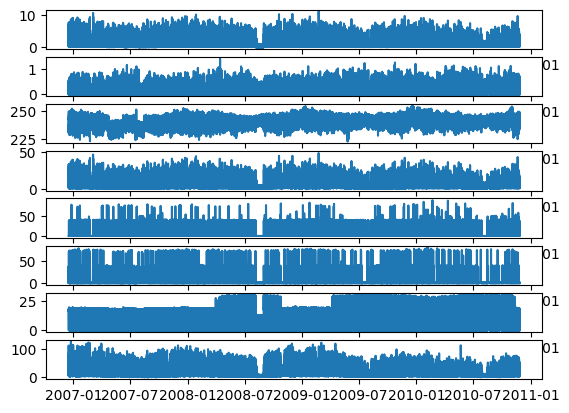

In [94]:
import matplotlib.pyplot as plt

plt.figure()
fig, ax = plt.subplots(nrows=8, ncols=1)
for i in range(len(df_energy.columns)):
  #plt.subplot(len(df_energy.columns), 1, i+1)
  column_value = df_energy[df_energy.columns[i]].astype(float)
  ax[i].plot(column_value)
  #plt.plot(column_value)
  #plt.title(df_energy.columns[i])
plt.show()


In [99]:
df_energy.iloc[0]

Global_active_power         4.216
Global_reactive_power       0.418
Voltage                   234.840
Global_intensity           18.400
Sub_metering_1              0.000
Sub_metering_2              1.000
Sub_metering_3               17.0
sub_metering_4           52.26667
Name: 2006-12-16 17:24:00, dtype: object

In [101]:
for i in df_energy.columns:
  df_energy[i] = df_energy[i].astype('float32')

In [102]:
daily_groups = df_energy.resample('D')
daily_groups

In [103]:
df_energy_daily = daily_groups.sum()
# summarize
print(df_energy_daily.shape)
print(df_energy_daily.head())

(1442, 8)
            Global_active_power  Global_reactive_power       Voltage  \
datetime                                                               
2006-12-16          1209.176025              34.922001   93552.53125   
2006-12-17          3390.459961             226.005997  345725.31250   
2006-12-18          2203.825928             161.792007  347373.62500   
2006-12-19          1666.193970             150.942001  348479.00000   
2006-12-20          2225.748047             160.998001  348923.62500   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
datetime                                                                       
2006-12-16       5180.799805             0.0           546.0          4926.0   
2006-12-17      14398.599609          2033.0          4187.0         13341.0   
2006-12-18       9247.200195          1063.0          2621.0         14018.0   
2006-12-19       7094.000000           839.0          7602.0          6197.0   
2006-